In [2]:
nn_invcc_at_Pbar_TK = lambda Pbar, TK: Pbar*bar_to_AU/(TK*K_to_AU)*AU_to_invcc

T_room_K = 290
Xe_nn_invcc = nn_invcc_at_Pbar_TK(5, T_room_K)
He_nn_invcc = nn_invcc_at_Pbar_TK(74, T_room_K)
Ar_nn_invcc = nn_invcc_at_Pbar_TK(25, T_room_K)

Xe_ionization_energies_eV = np.array([0, 12.1298437, 20.975, 31.05, 42.20 , 54.1, 66.703, 91.6, 105.9778, 179.84, 202.0, 229.02])
Ar_ionization_energies_eV = np.array([0, 15.7596119, 27.62967, 40.735, 59.58, 74.84, 91.290])
He_ionization_energies_eV = np.array([0, 24.587389011, 54.4177655282])

print(f"Xe ne = {Xe_nn_invcc:0.3e} [1/cc] ")
print(f"He ne = {He_nn_invcc:0.3e} [1/cc] ") 
print(f"Ar ne = {Ar_nn_invcc:0.3e} [1/cc] ")

Xe_TK_peak = 16.60952380952381e3 # 0 ns?
He_TK_peak = 14.790528233151186e3 # 0.0031746031746031746 ns
Ar_TK_peak = 17.761029411764707e3 # 0.008097165991902834 ns?

Xe ne = 1.249e+20 [1/cc] 
He ne = 1.848e+21 [1/cc] 
Ar ne = 6.244e+20 [1/cc] 


### Element Information

In [3]:
element='Xe'

if element=='Xe':
    Z, A = 54, 131
    n_i = Xe_nn_invcc *1e6
    m_i = A*m_p
    r_i = 1/(4/3*π*n_i)**(1/3)*m_to_AU
    
    Ti_init = 300 # K
    Te_init = Xe_TK_peak # K

    χ0_eV = 12.1298437  # eV See 
    χ0_J = χ0_eV*eV_to_J

    ionization_file="../../data/Xe5bar_Saha.txt"
    element_data_file = "../../data/experimental_data/Xe_5bar_Te.txt"
    N_n, N_T = 20, 200
    tmax=18e-9
    dt=1e-10
    

elif element=='He':
    Z, A = 2, 4
    n_i = He_nn_invcc *1e6
    m_i = A*m_p
    r_i = 1/(4/3*π*n_i)**(1/3)*m_to_AU

    Ti_init = 300 # K
    Te_init = He_TK_peak # K

    χ0_eV = 24.587389011  # eV See 
    χ0_J = χ0_eV*eV_to_J

    ionization_file="../../data/He74bar_Saha.txt"
    element_data_file = "../../data/experimental_data/He_74bar_Te.txt"

    N_n, N_T = 20, 200
    tmax=1e-9
    dt=1e-11

    
elif element=='Ar':
    Z, A = 18, 39.948
    n_i = Ar_nn_invcc *1e6
    m_i = A*m_p
    r_i = 1/(4/3*π*n_i)**(1/3)*m_to_AU

    Ti_init = 300 # K
    Te_init = Ar_TK_peak # K

    χ0_eV = 15.7596119  # eV See 
    χ0_J = χ0_eV*eV_to_J

    ionization_file="../../data/Ar25bar_Saha.txt"
    element_data_file = "../../data/experimental_data/Ar_25bar_Te.txt"

    N_n, N_T = 20, 200
    tmax=4.5e-9
    dt=1e-11


print(f"Cold pressure: P_cold = {n_i*Ti_init*k_B * Pa_to_AU*AU_to_bar:0.3f} bar = {n_i*Ti_init*k_B * 1e-9:0.3f} GPa ")
print(f"Hot pressure: P_hot = {n_i*Te_init*k_B * Pa_to_AU*AU_to_bar:0.3f} bar = {n_i*Te_init*k_B * 1e-9:0.3f} GPa ")
print(f"Density: ρ = {n_i*m_i:0.3f} [kg/m^3] =  {1e-3*n_i*m_i:0.3f} [g/cm^3] ")
print(f"Ion sphere radius: r_i = {r_i:0.3f} [au]")


Cold pressure: P_cold = 5.172 bar = 0.001 GPa 
Hot pressure: P_hot = 286.371 bar = 0.029 GPa 
Density: ρ = 27.320 [kg/m^3] =  0.027 [g/cm^3] 
Ion sphere radius: r_i = 23.453 [au]


In [6]:
Element_data = read_csv(element_data_file, delim_whitespace=True, header=1)
Element_data

,t[ns],T[kK]
0,0.000000,16.609524
1,0.059055,16.571429
2,0.118110,16.495238
3,0.206693,16.066667
4,0.295276,15.695238
5,0.531496,15.066667
6,0.767717,14.742857
7,1.033465,14.323810
8,1.624016,13.704762
9,2.066929,13.485714


In [73]:
from scipy.optimize import curve_fit

t0  =  np.array(Element_data['t[ns]'])[0]
Te_0 = np.array(Element_data['T[kK]'])[0]
def exp_lin(t, T1, τ, dTdt):
    return (Te_0/2 - T1/2)*np.exp(-(t-t0)/τ) + (Te_0/2 + T1/2)  - dTdt*(t-t0)

sol = curve_fit(exp_lin, Element_data['t[ns]'], Element_data['T[kK]'])
print("sol:", sol)

fit_params = sol[0]
fit =  lambda t: exp_lin(t, *fit_params)

sol: (array([9.33045028, 1.24510888, 0.1265816 ]), array([[ 1.78257251e-02, -6.02882717e-03,  6.92639242e-04],
       [-6.02882717e-03,  3.48550106e-03, -2.23266259e-04],
       [ 6.92639242e-04, -2.23266259e-04,  3.10943111e-05]]))


In [74]:

def plot_temperatures(figax=None,title='', x_label=True, y_label=True):
    if figax is None:
        fig, ax = plt.subplots(figsize=(10,8), facecolor='white')
    else:
        fig, ax = figax 
    fig.suptitle(r"Local Simulation Xe at 5 bar", fontsize=20)

    dense_t_list = np.linspace(0,18,num=100)

    # Plot Te
    #Data and fit
    # ax.plot(Xe_data['t[ns]'], Texp_fit_form(Xe_data['t[ns]'],*Te_vals), 'r--', label='Experiment Data')
    ax.plot(Element_data['t[ns]'], Element_data['T[kK]'], 'rx', label='Experiment Data')
    

    if y_label: 
        ax.set_ylabel(r'$T_e$ [kK]', fontsize=20, color='r')
    else:
        ax.tick_params(axis='y',which='both',left=False,labelleft=False)
    if x_label:
        ax.set_xlabel('t [ns]', fontsize=20)
    else:
        ax.tick_params(axis='x',bottom=False,labelbottom=False)
    
    # ax.set_xlim(0,12)

    ax.set_ylim(5,18)
    ax.tick_params(labelsize=20)
    ax.tick_params(axis='y',color='r', labelcolor='r')

    ax.set_title(title)
    # ax.legend(handles=legend_elements, loc='upper right')
    ax.legend(loc='center right')
    return fig, ax


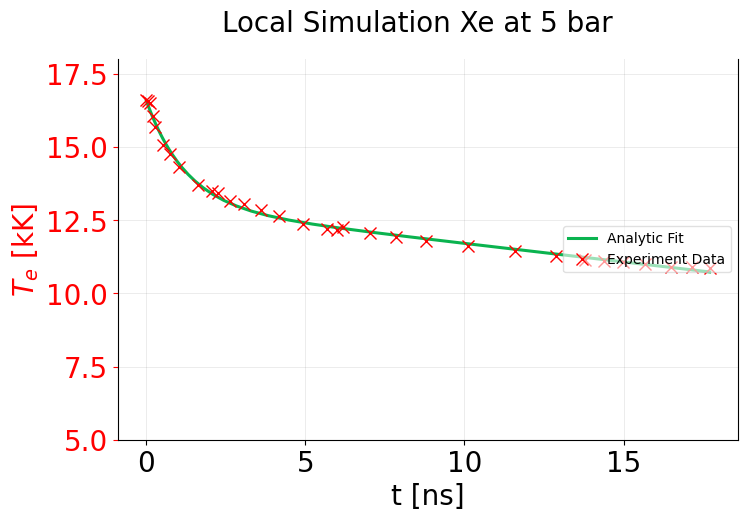

In [78]:
fig, ax  = plt.subplots()

t_array = np.geomspace(np.array(Element_data['t[ns]'])[0] + 1e-2, np.array(Element_data['t[ns]'])[-1])
ax.plot(t_array, fit(t_array), label='Analytic Fit' )


plot_temperatures(figax = (fig, ax));

In [82]:
Te_array = fit(t_array)
dot_Te_array = (fit(t_array*(1+1e-6)) - fit(t_array*(1-1e-6)))/(t_array*2*1e-6)

In [86]:


def make_ionization_function(Z, n_i, Zbar_rescale = 1, χ_rescale = 1):
    """
    Gets the ionization profile of the ion using TF AA fit.
    Args:
        None
    Returns:
        None
    """

    saved_data = read_csv(ionization_file, delim_whitespace=True, header=1)
    n_invm3_mesh = np.array(saved_data['n[1/cc]']).reshape(N_n, N_T)*1e6
    T_K_mesh     = np.array(saved_data['T[K]']).reshape(N_n, N_T)
    Zbar_mesh    = np.array(saved_data['Zbar']).reshape(N_n, N_T)
    χ_J_mesh    = np.array(saved_data['χ_1[eV]']).reshape(N_n, N_T)*eV_to_J
    Δχ_J_mesh    = χ0_J - χ_J_mesh
    
    zbar_interp = RegularGridInterpolator((n_invm3_mesh[:,0],T_K_mesh[0,:]), Zbar_mesh, bounds_error=False)
    Δχ_interp   = RegularGridInterpolator((n_invm3_mesh[:,0],T_K_mesh[0,:]), Δχ_J_mesh, bounds_error=False)
        
    @np.vectorize()
    def Zbar_func(Te): # in kelvin
        # above_n_i = n_i > np.max(n_invm3_mesh[:,0])
        # below_n_i = n_i < np.min(n_invm3_mesh[:,0])
        above_Te  = Te > np.max(T_K_mesh[0,:])
        below_Te  = Te < np.min(T_K_mesh[0,:])

        if above_Te:
            return 1.0
        elif below_Te:
            return np.min(Zbar_mesh)
        else:
            return Zbar_rescale * zbar_interp((n_i,Te))

    @np.vectorize()
    def χ_func(Te):
        # above_n_i = n_i > np.max(n_invm3_mesh[:,0])
        # below_n_i = n_i < np.min(n_invm3_mesh[:,0])
        above_Te  = Te > np.max(T_K_mesh[0,:])
        below_Te  = Te < np.min(T_K_mesh[0,:])

        if above_Te:
            n_i_closest = np.argmin( np.abs( n_invm3_mesh[:,0]-n_i ))
            return Δχ_J_mesh[n_i_closest,-1]
        elif below_Te:
            n_i_closest = np.argmin( np.abs( n_invm3_mesh[:,0]-n_i ))
            return Δχ_J_mesh[n_i_closest,0]
        return χ_rescale * (χ0_J - Δχ_interp((n_i,Te)))

    return Zbar_func, χ_func
Zbar_func, χ_func =  make_ionization_function(Z, n_i)

In [ ]:
fig, ax = plt.subplots()

ax.plot()